In [13]:
#Importing libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

# Load INFY data
ticker = yf.Ticker("INFY")
data = ticker.history(start="2022-01-01", end="2024-12-31", interval="1d")
data = data.dropna().drop(['Dividends', 'Stock Splits'], axis=1)


,Open,High,Low,Close,MA20,BB_upper,BB_lower
Date,,,,,,,
2022-04-04 00:00:00-04:00,22.676859,22.843058,22.658394,22.843058,22.637616,23.520578,21.754654
2022-04-05 00:00:00-04:00,22.621460,22.658394,22.409096,22.510660,22.686091,23.407219,21.964962
2022-04-06 00:00:00-04:00,22.076694,22.270594,21.919729,22.132093,22.689322,23.399271,21.979374
2022-04-07 00:00:00-04:00,21.928963,22.159794,21.855097,21.993595,22.688399,23.402094,21.974704
2022-04-08 00:00:00-04:00,21.956663,22.067461,21.827396,21.882797,22.674087,23.441121,21.907054


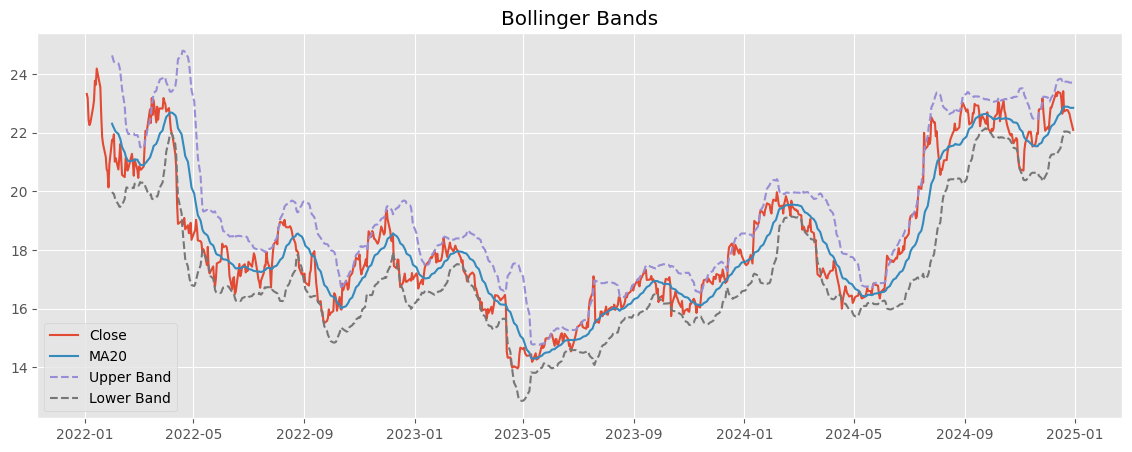

In [21]:

# Show table after 3 months
def show_table(df, cols):
    start_date = df.index.min()
    cutoff = start_date + pd.DateOffset(months=3)
    selected = df[df.index > cutoff].head(5)
    display(selected[cols])

# Bollinger Bands
def add_bollinger_bands(df, window=20, num_std=2):
    df['MA20'] = df['Close'].rolling(window).mean()
    df['BB_upper'] = df['MA20'] + num_std * df['Close'].rolling(window).std()
    df['BB_lower'] = df['MA20'] - num_std * df['Close'].rolling(window).std()
    return df

data_bb = data.copy()
data_bb = add_bollinger_bands(data_bb)

# Table
bb_cols = ['Open', 'High', 'Low', 'Close', 'MA20', 'BB_upper', 'BB_lower']
show_table(data_bb, bb_cols)

# Plot
plt.figure(figsize=(14, 5))
plt.plot(data_bb['Close'], label='Close')
plt.plot(data_bb['MA20'], label='MA20')
plt.plot(data_bb['BB_upper'], label='Upper Band', linestyle='--')
plt.plot(data_bb['BB_lower'], label='Lower Band', linestyle='--')
plt.title("Bollinger Bands")
plt.legend()
plt.show()


,Open,High,Low,Close,MovingA,SMA,Upper,Lower,Change,RSI
Date,,,,,,,,,,
2022-04-04 00:00:00-04:00,22.676859,22.843058,22.658394,22.843058,22.957548,22.855982,23.254924,22.457041,0.120035,55.064468
2022-04-05 00:00:00-04:00,22.621460,22.658394,22.409096,22.510660,22.822742,22.818126,23.271219,22.365034,-0.332397,42.505169
2022-04-06 00:00:00-04:00,22.076694,22.270594,21.919729,22.132093,22.638078,22.786733,23.377113,22.196353,-0.378567,44.420600
2022-04-07 00:00:00-04:00,21.928963,22.159794,21.855097,21.993595,22.440486,22.708250,23.483317,21.933184,-0.138498,35.680750
2022-04-08 00:00:00-04:00,21.956663,22.067461,21.827396,21.882797,22.272441,22.613148,23.538541,21.687754,-0.110798,42.816926


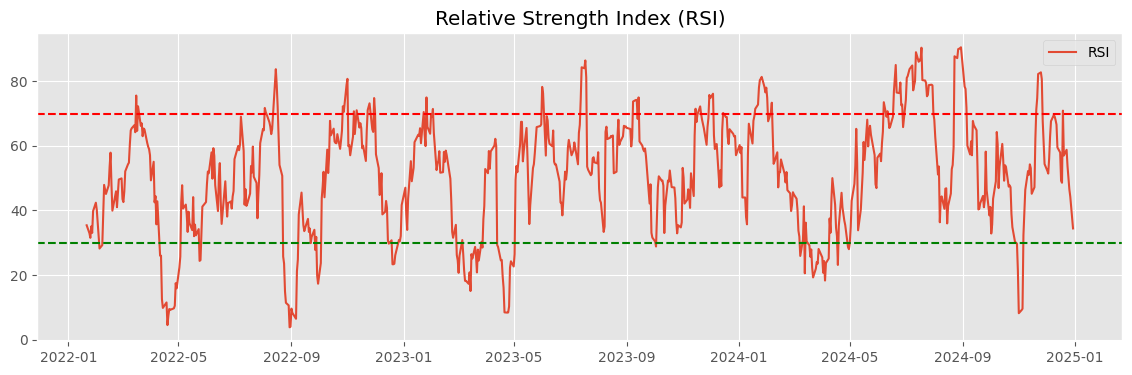

In [15]:
# RELATIVE STRENGTH INDEX (RSI)

def add_rsi(df, window=14):
    delta = df['Close'].diff()
    df['Change'] = delta
    gain = delta.where(delta > 0, 0.0)
    loss = -delta.where(delta < 0, 0.0)
    avg_gain = gain.rolling(window=window, min_periods=window).mean()
    avg_loss = loss.rolling(window=window, min_periods=window).mean()
    rs = avg_gain / avg_loss
    df['RSI'] = 100 - (100 / (1 + rs))
    return df

data_rsi = data.copy()
data_rsi = add_rsi(data_rsi)

# Add Moving Average and SMA for consistency with previous columns
data_rsi['MovingA'] = data_rsi['Close'].rolling(window=5).mean()
data_rsi['SMA'] = data_rsi['Close'].rolling(window=10).mean()
data_rsi['Upper'] = data_rsi['SMA'] + 2 * data_rsi['Close'].rolling(window=10).std()
data_rsi['Lower'] = data_rsi['SMA'] - 2 * data_rsi['Close'].rolling(window=10).std()

# Show Table
rsi_cols = ['Open', 'High', 'Low', 'Close', 'MovingA', 'SMA', 'Upper', 'Lower', 'Change', 'RSI']
start_date = data_rsi.index.min()
cutoff = start_date + pd.DateOffset(months=3)
display(data_rsi[data_rsi.index > cutoff].head(5)[rsi_cols])

# Plot RSI
plt.figure(figsize=(14, 4))
plt.plot(data_rsi['RSI'], label='RSI')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title("Relative Strength Index (RSI)")
plt.legend()
plt.show()


,Open,High,Low,Close,MovingA,SMA,Upper,Lower,Change,RSI,Fast,Slow,MACD,Signal
Date,,,,,,,,,,,,,,
2022-04-04 00:00:00-04:00,22.676859,22.843058,22.658394,22.843058,22.957548,22.855982,23.254924,22.457041,0.120035,55.064468,22.756048,22.395471,0.360577,0.373666
2022-04-05 00:00:00-04:00,22.621460,22.658394,22.409096,22.510660,22.822742,22.818126,23.271219,22.365034,-0.332397,42.505169,22.718296,22.404003,0.314293,0.361792
2022-04-06 00:00:00-04:00,22.076694,22.270594,21.919729,22.132093,22.638078,22.786733,23.377113,22.196353,-0.378567,44.420600,22.628111,22.383862,0.244249,0.338283
2022-04-07 00:00:00-04:00,21.928963,22.159794,21.855097,21.993595,22.440486,22.708250,23.483317,21.933184,-0.138498,35.680750,22.530493,22.354953,0.175540,0.305735
2022-04-08 00:00:00-04:00,21.956663,22.067461,21.827396,21.882797,22.272441,22.613148,23.538541,21.687754,-0.110798,42.816926,22.430848,22.319978,0.110869,0.266762


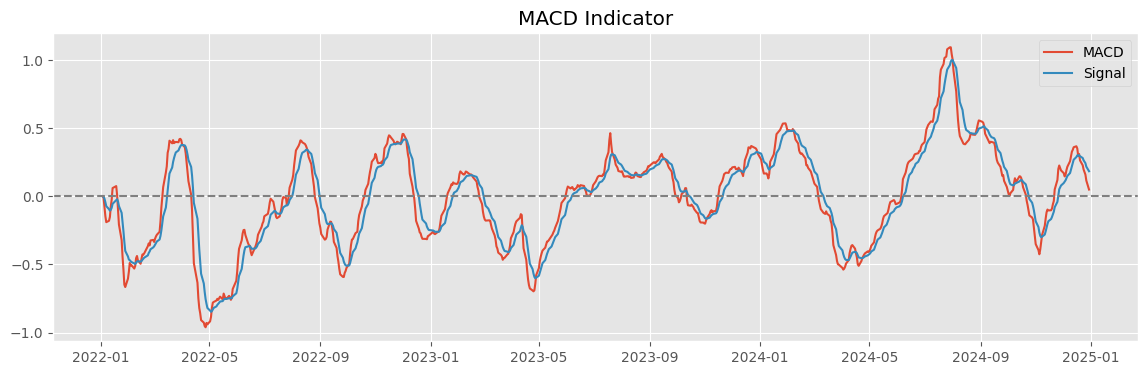

In [16]:
# MACD

def add_macd(df, fast=12, slow=26, signal=9):
    df['Fast'] = df['Close'].ewm(span=fast, adjust=False).mean()
    df['Slow'] = df['Close'].ewm(span=slow, adjust=False).mean()
    df['MACD'] = df['Fast'] - df['Slow']
    df['Signal'] = df['MACD'].ewm(span=signal, adjust=False).mean()
    return df

data_macd = data.copy()
data_macd = add_macd(data_macd)

# Add other metrics for the full table
data_macd['MovingA'] = data_macd['Close'].rolling(window=5).mean()
data_macd['SMA'] = data_macd['Close'].rolling(window=10).mean()
data_macd['Upper'] = data_macd['SMA'] + 2 * data_macd['Close'].rolling(window=10).std()
data_macd['Lower'] = data_macd['SMA'] - 2 * data_macd['Close'].rolling(window=10).std()
data_macd['Change'] = data_macd['Close'].diff()

# RSI (reuse function from earlier)
def add_rsi(df, window=14):
    delta = df['Close'].diff()
    gain = delta.where(delta > 0, 0.0)
    loss = -delta.where(delta < 0, 0.0)
    avg_gain = gain.rolling(window=window, min_periods=window).mean()
    avg_loss = loss.rolling(window=window, min_periods=window).mean()
    rs = avg_gain / avg_loss
    df['RSI'] = 100 - (100 / (1 + rs))
    return df

data_macd = add_rsi(data_macd)

# Show Table
macd_cols = ['Open', 'High', 'Low', 'Close', 'MovingA', 'SMA', 'Upper', 'Lower',
             'Change', 'RSI', 'Fast', 'Slow', 'MACD', 'Signal']

start_date = data_macd.index.min()
cutoff = start_date + pd.DateOffset(months=3)
display(data_macd[data_macd.index > cutoff].head(5)[macd_cols])

# Plot MACD
plt.figure(figsize=(14, 4))
plt.plot(data_macd['MACD'], label='MACD')
plt.plot(data_macd['Signal'], label='Signal')
plt.axhline(0, color='gray', linestyle='--')
plt.title("MACD Indicator")
plt.legend()
plt.show()


,Open,High,Low,Close,MovingA,SMA,Upper,Lower,Change,RSI,+DI,-DI,DX,ADX,%K,%SO,Fast,Slow,MACD,Signal
Date,,,,,,,,,,,,,,,,,,,,
2022-04-04 00:00:00-04:00,22.676859,22.843058,22.658394,22.843058,22.957548,22.855982,23.254924,22.457041,0.120035,55.064468,23.913070,14.130406,25.714433,36.040862,58.772150,67.327349,22.756048,22.395471,0.360577,0.373666
2022-04-05 00:00:00-04:00,22.621460,22.658394,22.409096,22.510660,22.822742,22.818126,23.271219,22.365034,-0.332397,42.505169,13.768115,18.985484,15.929149,33.325119,27.193132,49.642746,22.718296,22.404003,0.314293,0.361792
2022-04-06 00:00:00-04:00,22.076694,22.270594,21.919729,22.132093,22.638078,22.786733,23.377113,22.196353,-0.378567,44.420600,13.788094,26.705402,31.899711,32.132751,15.646214,33.870499,22.628111,22.383862,0.244249,0.338283
2022-04-07 00:00:00-04:00,21.928963,22.159794,21.855097,21.993595,22.440486,22.708250,23.483317,21.933184,-0.138498,35.680750,14.866978,25.978159,27.203192,31.080442,9.740229,17.526525,22.530493,22.354953,0.175540,0.305735
2022-04-08 00:00:00-04:00,21.956663,22.067461,21.827396,21.882797,22.272441,22.613148,23.538541,21.687754,-0.110798,42.816926,16.725357,27.288809,24.000118,29.595467,3.821740,9.736061,22.430848,22.319978,0.110869,0.266762


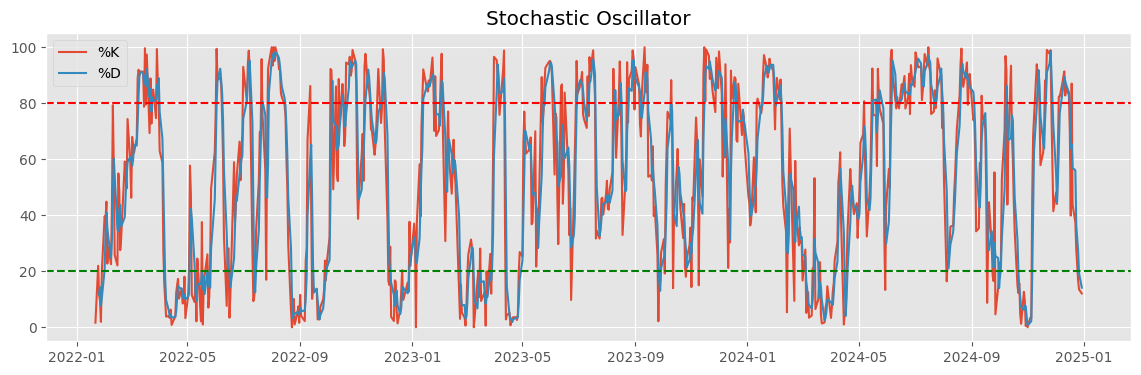

In [18]:
# STOCHASTIC OSCILLATOR with ADX prerequisites and fixed TR calculation

import numpy as np
import matplotlib.pyplot as plt

def add_stochastic_oscillator(df, k_window=14, d_window=3):
    low_min = df['Low'].rolling(window=k_window).min()
    high_max = df['High'].rolling(window=k_window).max()
    df['%K'] = 100 * (df['Close'] - low_min) / (high_max - low_min)
    df['%SO'] = df['%K'].rolling(window=d_window).mean()  # %D
    return df

# Assuming 'data' is your original DataFrame with OHLCV
data_so = data.copy()

data_so = add_stochastic_oscillator(data_so)

# Add other columns needed in table
data_so['MovingA'] = data_so['Close'].rolling(window=5).mean()
data_so['SMA'] = data_so['Close'].rolling(window=10).mean()
data_so['Upper'] = data_so['SMA'] + 2 * data_so['Close'].rolling(window=10).std()
data_so['Lower'] = data_so['SMA'] - 2 * data_so['Close'].rolling(window=10).std()
data_so['Change'] = data_so['Close'].diff()

# RSI function from before
def add_rsi(df, window=14):
    delta = df['Close'].diff()
    gain = delta.where(delta > 0, 0.0)
    loss = -delta.where(delta < 0, 0.0)
    avg_gain = gain.rolling(window=window, min_periods=window).mean()
    avg_loss = loss.rolling(window=window, min_periods=window).mean()
    rs = avg_gain / avg_loss
    df['RSI'] = 100 - (100 / (1 + rs))
    return df

data_so = add_rsi(data_so)

# MACD function from before
def add_macd(df, fast=12, slow=26, signal=9):
    df['Fast'] = df['Close'].ewm(span=fast, adjust=False).mean()
    df['Slow'] = df['Close'].ewm(span=slow, adjust=False).mean()
    df['MACD'] = df['Fast'] - df['Slow']
    df['Signal'] = df['MACD'].ewm(span=signal, adjust=False).mean()
    return df

data_so = add_macd(data_so)

# ADX prerequisites with fixed True Range calculation
data_so['+DM'] = np.where((data_so['High'] - data_so['High'].shift()) > (data_so['Low'].shift() - data_so['Low']),
                          np.maximum(data_so['High'] - data_so['High'].shift(), 0), 0)
data_so['-DM'] = np.where((data_so['Low'].shift() - data_so['Low']) > (data_so['High'] - data_so['High'].shift()),
                          np.maximum(data_so['Low'].shift() - data_so['Low'], 0), 0)

data_so['H-L'] = data_so['High'] - data_so['Low']
data_so['H-PC'] = abs(data_so['High'] - data_so['Close'].shift())
data_so['L-PC'] = abs(data_so['Low'] - data_so['Close'].shift())
data_so['TR'] = data_so[['H-L', 'H-PC', 'L-PC']].max(axis=1)
data_so['ATR'] = data_so['TR'].rolling(window=14).mean()

data_so['+DI'] = 100 * (data_so['+DM'].rolling(window=14).mean() / data_so['ATR'])
data_so['-DI'] = 100 * (data_so['-DM'].rolling(window=14).mean() / data_so['ATR'])
data_so['DX'] = 100 * abs(data_so['+DI'] - data_so['-DI']) / (data_so['+DI'] + data_so['-DI'])
data_so['ADX'] = data_so['DX'].rolling(window=14).mean()

# Show Table
so_cols = ['Open', 'High', 'Low', 'Close', 'MovingA', 'SMA', 'Upper', 'Lower', 'Change', 'RSI',
           '+DI', '-DI', 'DX', 'ADX', '%K', '%SO', 'Fast', 'Slow', 'MACD', 'Signal']

start_date = data_so.index.min()
cutoff = start_date + pd.DateOffset(months=3)
display(data_so[data_so.index > cutoff].head(5)[so_cols])

# 📈 Plot Stochastic Oscillator
plt.figure(figsize=(14, 4))
plt.plot(data_so['%K'], label='%K')
plt.plot(data_so['%SO'], label='%D')
plt.axhline(80, color='red', linestyle='--')
plt.axhline(20, color='green', linestyle='--')
plt.title("Stochastic Oscillator")
plt.legend()
plt.show()



,Open,High,Low,Close,MovingA,SMA,Upper,Lower,Change,RSI,+DM,-DM,+DI,-DI,DX,ADX
Date,,,,,,,,,,,,,,,,
2022-04-04 00:00:00-04:00,22.676859,22.843058,22.658394,22.843058,22.957548,22.855982,23.254924,22.457041,0.120035,55.064468,0.0,0.000000,23.913070,14.130406,25.714433,36.040862
2022-04-05 00:00:00-04:00,22.621460,22.658394,22.409096,22.510660,22.822742,22.818126,23.271219,22.365034,-0.332397,42.505169,0.0,0.249298,13.768115,18.985484,15.929149,33.325119
2022-04-06 00:00:00-04:00,22.076694,22.270594,21.919729,22.132093,22.638078,22.786733,23.377113,22.196353,-0.378567,44.420600,0.0,0.489366,13.788094,26.705402,31.899711,32.132751
2022-04-07 00:00:00-04:00,21.928963,22.159794,21.855097,21.993595,22.440486,22.708250,23.483317,21.933184,-0.138498,35.680750,0.0,0.064632,14.866978,25.978159,27.203192,31.080442
2022-04-08 00:00:00-04:00,21.956663,22.067461,21.827396,21.882797,22.272441,22.613148,23.538541,21.687754,-0.110798,42.816926,0.0,0.027700,16.725357,27.288809,24.000118,29.595467


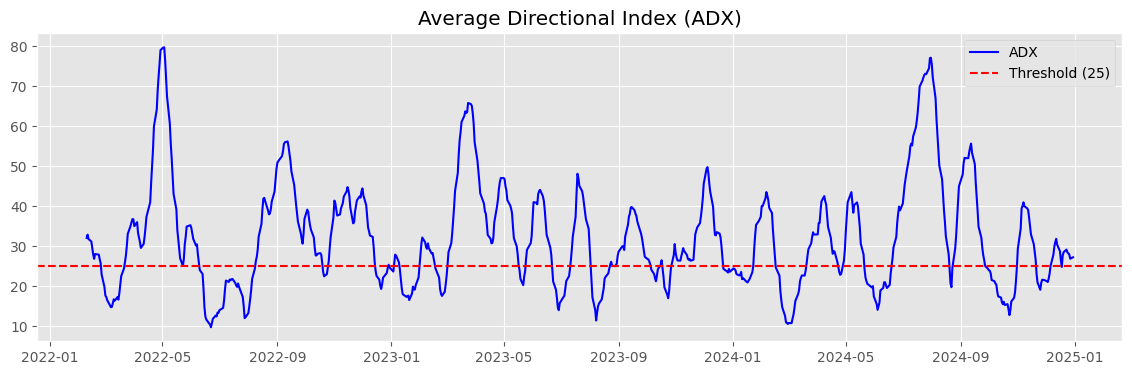

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# ADX calculation function
def add_adx(df, window=14):
    # Calculate directional movements
    df['UpMove'] = df['High'] - df['High'].shift(1)
    df['DownMove'] = df['Low'].shift(1) - df['Low']

    df['+DM'] = np.where((df['UpMove'] > df['DownMove']) & (df['UpMove'] > 0), df['UpMove'], 0.0)
    df['-DM'] = np.where((df['DownMove'] > df['UpMove']) & (df['DownMove'] > 0), df['DownMove'], 0.0)

    # True Range components
    df['H-L'] = df['High'] - df['Low']
    df['H-PC'] = abs(df['High'] - df['Close'].shift(1))
    df['L-PC'] = abs(df['Low'] - df['Close'].shift(1))

    # True Range
    df['TR'] = df[['H-L', 'H-PC', 'L-PC']].max(axis=1)

    # ATR (Average True Range)
    df['ATR'] = df['TR'].rolling(window=window).mean()

    # Smooth +DM and -DM
    df['+DM_smoothed'] = df['+DM'].rolling(window=window).mean()
    df['-DM_smoothed'] = df['-DM'].rolling(window=window).mean()

    # Calculate +DI and -DI
    df['+DI'] = 100 * (df['+DM_smoothed'] / df['ATR'])
    df['-DI'] = 100 * (df['-DM_smoothed'] / df['ATR'])

    # Calculate DX
    df['DX'] = 100 * (abs(df['+DI'] - df['-DI']) / (df['+DI'] + df['-DI']))

    # ADX is the rolling average of DX
    df['ADX'] = df['DX'].rolling(window=window).mean()

    return df

# Create a copy of original data for ADX calculations
data_adx = data.copy()

# Apply ADX function
data_adx = add_adx(data_adx)

# Add Moving averages and SMA for table (optional, same as other indicators)
data_adx['MovingA'] = data_adx['Close'].rolling(window=5).mean()
data_adx['SMA'] = data_adx['Close'].rolling(window=10).mean()
data_adx['Upper'] = data_adx['SMA'] + 2 * data_adx['Close'].rolling(window=10).std()
data_adx['Lower'] = data_adx['SMA'] - 2 * data_adx['Close'].rolling(window=10).std()
data_adx['Change'] = data_adx['Close'].diff()

# Add RSI (reuse function from before)
data_adx = add_rsi(data_adx)

# Columns to display in table
adx_cols = ['Open', 'High', 'Low', 'Close', 'MovingA', 'SMA', 'Upper', 'Lower', 'Change', 'RSI',
            '+DM', '-DM', '+DI', '-DI', 'DX', 'ADX']

start_date = data_adx.index.min()
cutoff = start_date + pd.DateOffset(months=3)
display(data_adx[data_adx.index > cutoff].head(5)[adx_cols])

# Plot ADX
plt.figure(figsize=(14,4))
plt.plot(data_adx['ADX'], label='ADX', color='blue')
plt.axhline(25, color='red', linestyle='--', label='Threshold (25)')
plt.title("Average Directional Index (ADX)")
plt.legend()
plt.show()


,Open,High,Low,Close,Volume,Typical_Price,TPV,TPV_Sum,Volume_Sum,VWAP
Date,,,,,,,,,,
2022-04-04 00:00:00-04:00,22.676859,22.843058,22.658394,22.843058,12357900,22.781503,2.815315e+08,1.545871e+10,707740000,21.842356
2022-04-05 00:00:00-04:00,22.621460,22.658394,22.409096,22.510660,6293000,22.526050,1.417564e+08,1.560047e+10,714033000,21.848382
2022-04-06 00:00:00-04:00,22.076694,22.270594,21.919729,22.132093,12373700,22.107472,2.735512e+08,1.587402e+10,726406700,21.852795
2022-04-07 00:00:00-04:00,21.928963,22.159794,21.855097,21.993595,8337400,22.002829,1.834464e+08,1.605746e+10,734744100,21.854497
2022-04-08 00:00:00-04:00,21.956663,22.067461,21.827396,21.882797,5583400,21.925885,1.224210e+08,1.617988e+10,740327500,21.855036


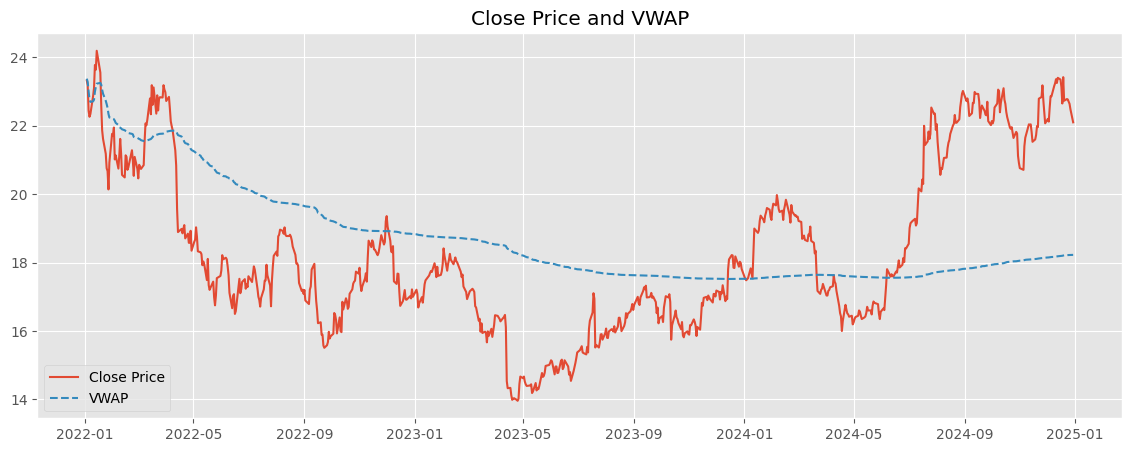

In [20]:
import matplotlib.pyplot as plt

def add_vwap(df):
    # Typical Price
    df['Typical_Price'] = (df['High'] + df['Low'] + df['Close']) / 3

    # TP * Volume
    df['TPV'] = df['Typical_Price'] * df['Volume']

    # Cumulative sums for VWAP calculation
    df['TPV_Sum'] = df['TPV'].cumsum()
    df['Volume_Sum'] = df['Volume'].cumsum()

    # VWAP calculation
    df['VWAP'] = df['TPV_Sum'] / df['Volume_Sum']

    return df

# Copy original data
data_vwap = data.copy()

# Add VWAP
data_vwap = add_vwap(data_vwap)

# Columns to display in table
vwap_cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'Typical_Price', 'TPV', 'TPV_Sum', 'Volume_Sum', 'VWAP']

start_date = data_vwap.index.min()
cutoff = start_date + pd.DateOffset(months=3)
display(data_vwap[data_vwap.index > cutoff].head(5)[vwap_cols])

# Plot Close price and VWAP
plt.figure(figsize=(14,5))
plt.plot(data_vwap['Close'], label='Close Price')
plt.plot(data_vwap['VWAP'], label='VWAP', linestyle='--')
plt.title('Close Price and VWAP')
plt.legend()
plt.show()
